In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

# Set the style
#sns.set_palette('pastel')
Cambridge_dark = sns.color_palette(['#D6083B', '#0072CF', '#EA7125', '#55A51C', '#8F2BBC', '#00B1C1', '#901C3B', '#003E74', '#CB4F00', '#445026', '#422E5D', '#106470'  ])
Cambridge_light = sns.color_palette(['#D6083B','#EB99A9','#0072CF','#68ACE5','#EA7125','#F3BD48','#55A51C','#AAB300','#8F2BBC','#AF95A3','#00B1C1','#91B9A4' ])
Spring_Pastels=sns.color_palette(["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])
Spring_Pastels_01=sns.color_palette(["#3b5998","#00aced","#007bb6","#517fa4","#dd4b39","#bb0000","#cb2027","#ff0084","#32506d","#0072b1","#ea4c89","#00bf8f","#1769ff","#171516","#00aff0","#fffa37","#64d448"])
Custom_Color_Palette = sns.color_palette(["#ebac23","#b80058","#008cf9","#00bbad","#d163e6","#b24502","#ff9287","#5954d6","#00c6f8","#878500","#00a76c","#bdbdbd"])

Use_Color_Palette = Cambridge_dark
specical_color = 'tab20'
Accent = 'Accent'
Set1 = 'Set1'
Pastel1 = 'Pastel1'
Paired = 'Paired'
sns.set_palette(specical_color)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
file_path = '../export/BTSelResults/'
Scenario_A_data_file = file_path + 'Scenario_A_BAU.csv'
Scenario_B_data_file = file_path + 'Scenario_B_PC.csv'
Scenario_C_data_file = file_path + 'Scenario_C_PC_Storage.csv'
def read_data(file_path):
    data = pd.read_csv(file_path, index_col=0, header=None)
    data = data.iloc[:, 1:]
    return data

Scenario_A_data = read_data(Scenario_A_data_file)
Scenario_B_data = read_data(Scenario_B_data_file)
Scenario_C_data = read_data(Scenario_C_data_file)

# Emission Assumption

In [7]:
def get_emission_data(BAU_data):
    emission_annual = BAU_data.loc['AnnualEmissions']
    # get the second column and make it as a list
    emission_annual.index=emission_annual.iloc[:,0].tolist()
    emission_annual = emission_annual.iloc[:,1:32]
    emission_annual.columns = list(range(2020, 2051))
    emission_annual = emission_annual.apply(pd.to_numeric, errors='coerce')
    emission_annual_co2 = emission_annual.loc['CO2']
    emission_annual_nox = emission_annual.loc['NOX']
    return emission_annual_co2, emission_annual_nox

In [8]:
Scenario_A_co2, Scenario_A_nox = get_emission_data(Scenario_A_data)

Text(0.5, 1.0, 'Emission Constraint for PC')

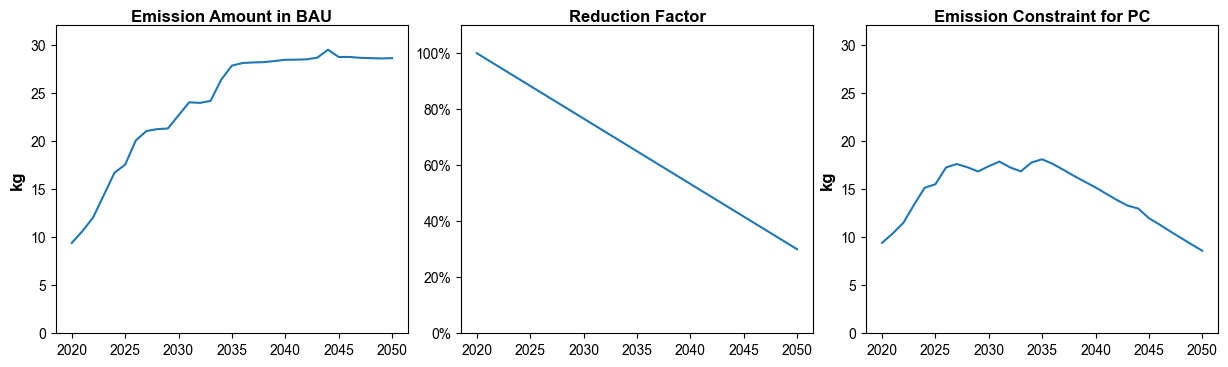

In [23]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(3)]

Scenario_A_co2.plot(kind='line', ax=axes[0],legend=False)
axes[0].set_ylabel('kg', fontsize=12, fontweight='bold')
axes[2].set_ylabel('kg', fontsize=12, fontweight='bold')

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

axes[1].yaxis.set_major_formatter(formatter)

linear_decrease_values = np.linspace(1, 0.3, 2050 - 2020 + 1)
linear_decrease_df = pd.DataFrame(linear_decrease_values, index=np.arange(2020, 2051), columns=['Percentage'])
linear_decrease_df.plot(kind='line', ax=axes[1],legend=False)

# set the y-axis label from 0 to 100
axes[1].set_ylim(0, 1.1)


# proudct the emission with the linear decrease
emission_constrain = Scenario_A_co2 * linear_decrease_df['Percentage']


emission_constrain.plot(kind='line', ax=axes[2],legend=False)

axes[0].set_ylim(0, 32)
axes[2].set_ylim(0, 32)


axes[0].set_title('Emission Amount in BAU', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Reduction Factor', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Emission Constraint for PC', verticalalignment='center', fontsize=12,fontweight='bold')

In [29]:
def get_energy_demand_activity(BAU_data):
    demand_annual_acivity = BAU_data.loc['UseByTechnologyByTimeSlice']
    energy_demand_acivity = demand_annual_acivity.iloc[56:120,0:35]
    # make the df group by the first column
    energy_demand_acivity = energy_demand_acivity.groupby(energy_demand_acivity.columns[0]).sum()
    # remove the first two columns
    energy_demand_acivity = energy_demand_acivity.iloc[:,2:]
    year_list = list(range(2020, 2051))
    energy_demand_acivity.columns = year_list
    energy_demand_list = ['Cooking','Cooking_N','Lamp','Lamp_N','Others','Others_N','Refrigerator','Refrigerator_N']
    energy_demand_acivity.index = energy_demand_list
    energy_demand_acivity = energy_demand_acivity.apply(pd.to_numeric, errors='coerce')
    #energy_demand_acivity = energy_demand_acivity.T
    return energy_demand_acivity


Scenario_A_energy_demand = get_energy_demand_activity(Scenario_A_data).sum()

Text(0.5, 1.0, 'Demand Constraint for PC')

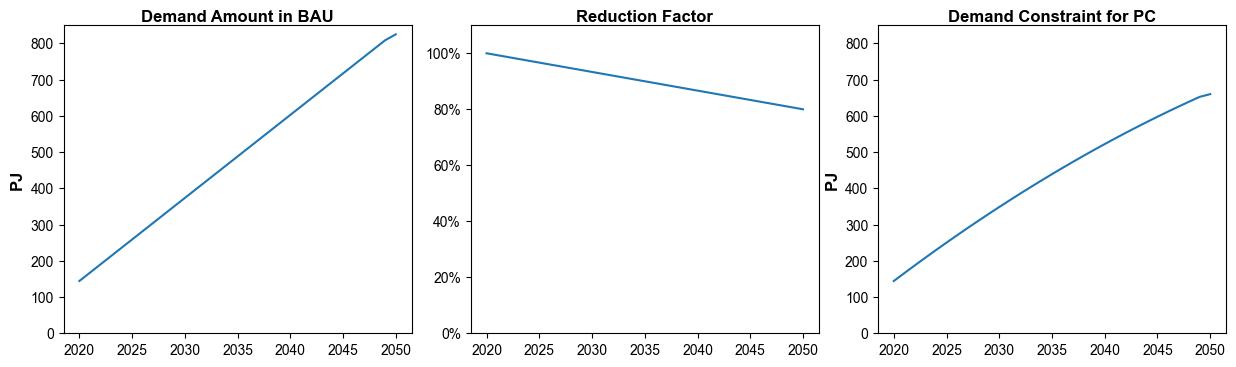

In [33]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.17)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(3)]

Scenario_A_energy_demand.plot(kind='line', ax=axes[0],legend=False)
axes[0].set_ylabel('PJ', fontsize=12, fontweight='bold')
axes[2].set_ylabel('PJ', fontsize=12, fontweight='bold')

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

axes[1].yaxis.set_major_formatter(formatter)

linear_decrease_values = np.linspace(1, 0.8, 2050 - 2020 + 1)
linear_decrease_df = pd.DataFrame(linear_decrease_values, index=np.arange(2020, 2051), columns=['Percentage'])
linear_decrease_df.plot(kind='line', ax=axes[1],legend=False)

# set the y-axis label from 0 to 100
axes[1].set_ylim(0, 1.1)


# proudct the emission with the linear decrease
demand_constrain = Scenario_A_energy_demand * linear_decrease_df['Percentage']


demand_constrain.plot(kind='line', ax=axes[2],legend=False)

axes[0].set_ylim(0, 850)
axes[2].set_ylim(0, 850)


axes[0].set_title('Demand Amount in BAU', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Reduction Factor', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Demand Constraint for PC', verticalalignment='center', fontsize=12,fontweight='bold')

In [53]:
# Define the data
years = "2020	2021	2022	2023	2024	2025	2026	2027	2028	2029	2030	2031	2032	2033	2034	2035	2036	2037	2038	2039	2040	2041	2042	2043	2044	2045	2046	2047	2048	2049	2050"
percentages = "10%	11%	12%	14%	16%	18%	21%	23%	26%	29%	32%	35%	39%	43%	46%	50%	54%	57%	61%	65%	68%	71%	74%	77%	79%	82%	84%	86%	88%	89%	90%"

# Split the data into lists
years = years.split("\t")
years = list(range(2020, 2051))
percentages = percentages.split("\t")

# Create a DataFrame from the lists
df_diffusion_rate = pd.DataFrame({'Year': years, 'Percentage': percentages})
# Set 'Year' as the index
df_diffusion_rate.set_index('Year', inplace=True)
df_diffusion_rate['Percentage'] = df_diffusion_rate['Percentage'].str.rstrip('%').astype('float') / 100.0

import pandas as pd
import matplotlib.pyplot as plt

# Define the data

El_TechDR_N = [2.9, 3.8, 4.9, 6.3, 7.9, 9.8, 12.1, 14.7, 17.7, 21.1, 25.0, 29.3, 34.0, 39.2, 44.8, 50.8, 57.2, 63.9, 70.8, 78.0, 85.2, 92.6, 100.1, 107.5, 114.8, 122.1, 129.3, 136.4, 143.3, 150.1, 155.6]
El_TechDL_N = [3.3, 4.4, 5.7, 7.3, 9.2, 11.4, 14.1, 17.1, 20.6, 24.6, 29.0, 34.0, 39.6, 45.6, 52.2, 59.2, 66.6, 74.3, 82.4, 90.7, 99.2, 107.8, 116.4, 125.1, 133.7, 142.1, 150.5, 158.7, 166.8, 174.7, 179.6]
El_TechDO_N = [1.2, 1.6, 2.1, 2.7, 3.4, 4.2, 5.2, 6.3, 7.6, 9.1, 10.7, 12.6, 14.6, 16.9, 19.3, 21.9, 24.6, 27.5, 30.5, 33.6, 36.7, 39.9, 43.1, 46.3, 49.5, 52.6, 55.7, 58.8, 61.7, 64.7, 68.4]
El_TechDC_N = [1.4, 1.8, 2.3, 3.0, 3.8, 4.7, 5.7, 7.0, 8.4, 10.0, 11.8, 13.9, 16.1, 18.6, 21.2, 24.1, 27.1, 30.3, 33.6, 37.0, 40.4, 43.9, 47.4, 50.9, 54.4, 57.9, 61.3, 64.7, 67.9, 71.2, 74.1]

# Create a DataFrame from the lists
df_diffusion_constraint = pd.DataFrame({'El_TechDR_N': El_TechDR_N, 'El_TechDL_N': El_TechDL_N, 'El_TechDO_N': El_TechDO_N, 'El_TechDC_N': El_TechDC_N}, index=years)

Text(0, 0.5, 'PJ')

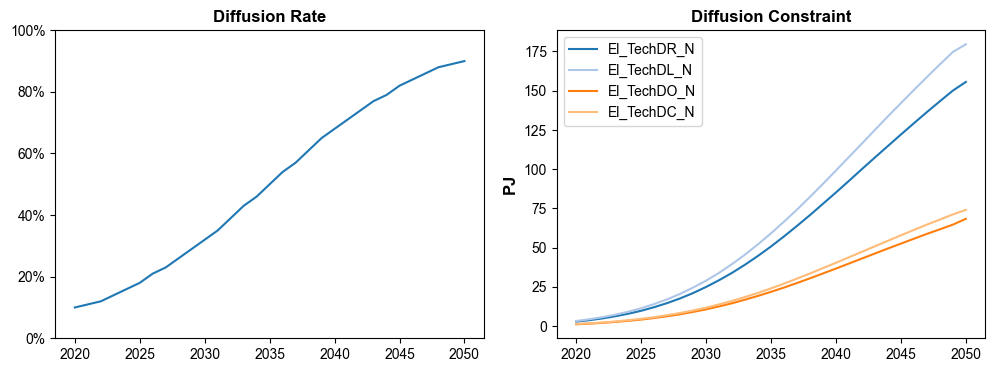

In [59]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(12,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.17)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(2)]

df_diffusion_rate.plot(kind='line', ax=axes[0],legend=False)
# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

axes[0].yaxis.set_major_formatter(formatter)
# set the y-axis label from 0 to 100
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('')

df_diffusion_constraint.plot(kind='line', ax=axes[1])


axes[0].set_title('Diffusion Rate', fontsize=12,fontweight='bold')
axes[1].set_title('Diffusion Constraint', fontsize=12,fontweight='bold')
axes[1].set_ylabel('PJ', fontsize=12, fontweight='bold')

Text(0, 0.5, 'GW')

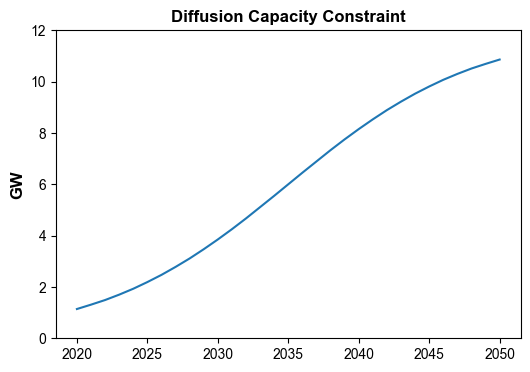

In [63]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(6,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 1)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(1)]

# Define the data
diffusion_constraint = [1.14, 1.31, 1.49, 1.70, 1.93, 2.19, 2.47, 2.78, 3.11, 3.47, 3.85, 4.25, 4.67, 5.11, 5.55, 6.00, 6.45, 6.89, 7.33, 7.75, 8.15, 8.53, 8.89, 9.22, 9.53, 9.81, 10.07, 10.30, 10.51, 10.69, 10.86]

# Create a DataFrame from the list
df_diffusion_constraint = pd.DataFrame({'Diffusion Constraint': diffusion_constraint}, index=years)

# Plot the DataFrame
df_diffusion_constraint.plot(kind='line', ax=axes[0],legend=False)

# Set the title and y-axis label
axes[0].set_ylim(0, 12)

axes[0].set_title('Diffusion Capacity Constraint', fontsize=12,fontweight='bold')
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')